## **Arewa DataScience Academy**
### Deep Learning Cohort 1.0
### WEEK 2 Exercises

### Ibrahim Manasseh (mannienokson@gmail.com)

In [18]:
import torch 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch import nn
import pandas as pd

### 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

In [19]:
#Forming our matrix of X
X = torch.arange(0,1,0.01).unsqueeze(dim = 1)

weight = 0.3
bias = 0.9

y = X*weight + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [20]:
# Splitting our dataset
split_point = int(0.8*(len(X)))
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print(f'X has {len(X)} elements')
print(f'X_train has {len(X_train)} elements')
print(f'y_train has {len(y_train)} elements')
print(f'X_test has {len(X_test)} elements')
print(f'y_test has {len(y_test)} elements')

X has 100 elements
X_train has 80 elements
y_train has 80 elements
X_test has 20 elements
y_test has 20 elements


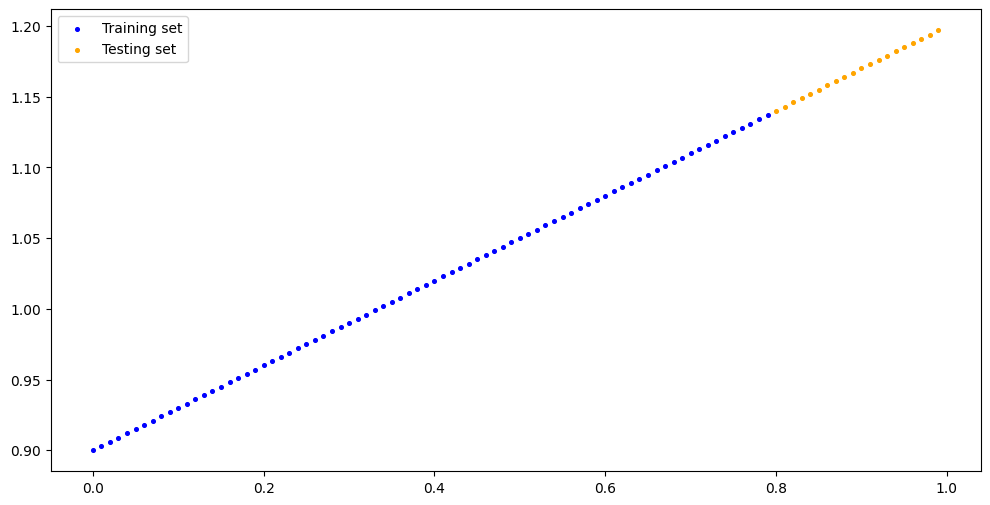

In [21]:
#Plotting our data

def plot_pred(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, predictions = None):
    plt.figure(figsize = (12,6))
    plt.scatter(X_train, y_train, s = 7, color = 'blue', label = 'Training set')
    plt.scatter(X_test, y_test, s = 7, color = 'orange', label = 'Testing set')
    if predictions != None:
        plt.scatter(X_test, predictions, s = 7, color = 'red', label = 'Testing set')
    plt.legend()
    


plot_pred()

### 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [22]:
# Simple Linear regression Model
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.rand(1))

    def forward(self, x):
        y_x = self.weight * x + self.bias
        return y_x

In [23]:
#Setting Seed
torch.manual_seed(42)

#Instantiating the Model
linreg = SimpleLinearRegression()

#Checking our values
for i in list(linreg.state_dict()):
    print(f'{i} = {linreg.state_dict()[i].item()}')

weight = 0.33669036626815796
bias = 0.3904482126235962


In [24]:
# Creating Agnostic Mode
device = 'cuda' if torch.cuda.is_available() else 'cpu'
linreg.to(device)
next(linreg.parameters()).device

device(type='cuda', index=0)

### 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [25]:
# Loss Function
loss = nn.L1Loss()

#Optimizer
optimizer = torch.optim.SGD(params = linreg.parameters(), lr = 0.01)

In [26]:
#test function
def test_func(model, test_set):
    model.eval()
    with torch.inference_mode():
        return model(test_set)

In [27]:
# Setting epochs
epochs = 300

epoch_info = pd.DataFrame({
    'Epoch': [],
    'Train Loss': [],
    'Test Loss': []
})

#Putting tensors on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#Test loss
for epoch in range(epochs):
    linreg.train()
    y_pred = linreg(X_train)
    train_loss = loss(y_train, y_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    test_pred = test_func(linreg, X_test)
    test_loss = loss(test_pred, y_test)
    if epoch%20 == 0:
        epoch_info = pd.concat([epoch_info, pd.DataFrame(dict(zip(epoch_info.columns, [[epoch], [train_loss.item()], [test_loss.item()]])))])
        epoch_info['Epoch'] = epoch_info['Epoch'].astype(int)
epoch_info

,Epoch,Train Loss,Test Loss
0,0,0.495059,0.463179
0,20,0.263854,0.192474
0,40,0.049217,0.059680
0,60,0.034145,0.078120
0,80,0.027291,0.062825
0,100,0.020437,0.047529
0,120,0.013586,0.031201
0,140,0.006734,0.014874
0,160,0.009004,0.000664
0,180,0.009004,0.000664


In [28]:
# Model Parameters
for i in linreg.state_dict():
    print(f'{i} = {linreg.state_dict()[i].item()}')

weight = 0.30773502588272095
bias = 0.9059485793113708


### 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [29]:
predictions = test_func(linreg, X_test)

pd.DataFrame({
    'True Value': y_test.squeeze().cpu(),
    'Predicted_value': predictions.squeeze().cpu(),
    'Absolute Error': abs(y_test-predictions).squeeze().cpu()
})

,True Value,Predicted_value,Absolute Error
0,1.140,1.152137,0.012137
1,1.143,1.155214,0.012214
2,1.146,1.158291,0.012291
3,1.149,1.161369,0.012369
4,1.152,1.164446,0.012446
5,1.155,1.167523,0.012523
6,1.158,1.170601,0.012601
7,1.161,1.173678,0.012678
8,1.164,1.176755,0.012755
9,1.167,1.179833,0.012833


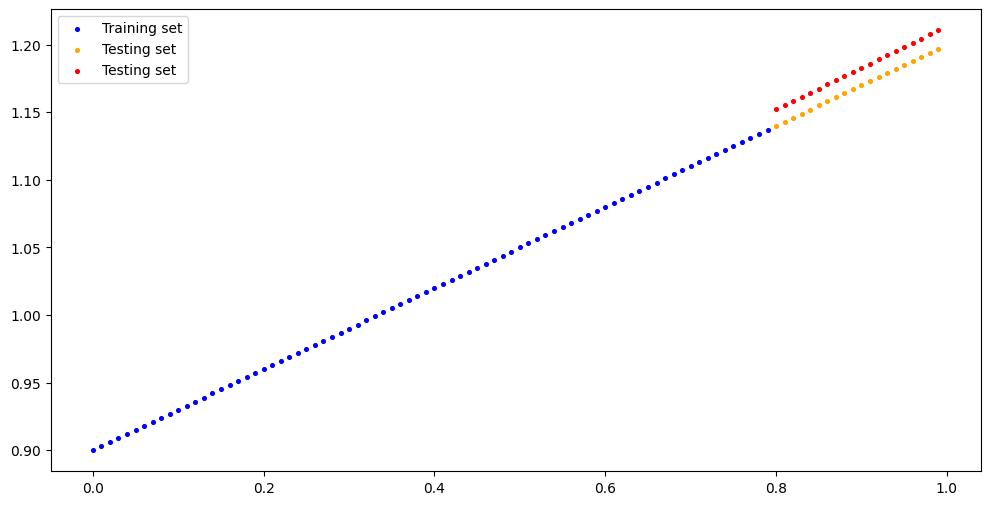

In [30]:
plot_pred(predictions = predictions.cpu())

### 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [31]:
# Saving our model
torch.save(linreg.state_dict(), 'LinReg.pth')

In [32]:
imported_model = SimpleLinearRegression()
imported_model.load_state_dict(torch.load('LinReg.pth'))
imported_model.to(device)

<ipython-input-32-3abd0848f500>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  imported_model.load_state_dict(torch.load('LinReg.pth'))


SimpleLinearRegression()

In [33]:
new_pred = test_func(imported_model,X_test)
new_pred

tensor([[1.1521],
        [1.1552],
        [1.1583],
        [1.1614],
        [1.1644],
        [1.1675],
        [1.1706],
        [1.1737],
        [1.1768],
        [1.1798],
        [1.1829],
        [1.1860],
        [1.1891],
        [1.1921],
        [1.1952],
        [1.1983],
        [1.2014],
        [1.2045],
        [1.2075],
        [1.2106]], device='cuda:0')

In [35]:
(new_pred == predictions).all().item()

True